# Intro Data Science

In [16]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

1. Usando el API de `AlphaVantage` descarga la información histórica de precios diaria (`TIME_SERIES_DAILY`) para los siguientes 5 tickers: `["GOOGL", "MSFT", "AAPL", "TSLA", "AMZN"]`

```
{'GOOGL': {'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2020-01-13 14:48:47', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2020-01-13': {'1. open': '1435.2500', '2. high': '1439.8900', '3. low': '1425.3700', '4. close': '1437.2850', '5. volume': '782014'}, '2020-01-10': {'1. open': '1429.4700', '2. high': '1434.9400', '3. low': '1419.6000', '4. close': '1428.9600', '5. volume': '1313178'}, '2020-01-09': {'1. open': '1421.9300', '2. high': '1428.6800', '3. low': '1410.2100', '4. close': '1419.7900', '5. volume': '1661438'}, '2020-01-08': {'1. open': '1394.8200', '2. high': '1411.8500', '3. low': '1392.6300', '4. close': '1405.0400...
```

In [ ]:
data_GOOGL = requests.get("https://www.alphavantage.co/query", params={
    "function": "TIME_SERIES_DAILY",
    "symbol": "GOOGL",
    "outputsize": "full",
    "apikey": "22QHX22QETFX32HQ",
}).json()

data_MSFT = requests.get("https://www.alphavantage.co/query", params={
    "function": "TIME_SERIES_DAILY",
    "symbol": "MSFT",
    "outputsize": "full",
    "apikey": "22QHX22QETFX32HQ",
}).json()

data_AAPL = requests.get("https://www.alphavantage.co/query", params={
    "function": "TIME_SERIES_DAILY",
    "symbol": "AAPL",
    "outputsize": "full",
    "apikey": "22QHX22QETFX32HQ",
}).json()

data_TSLA = requests.get("https://www.alphavantage.co/query", params={
    "function": "TIME_SERIES_DAILY",
    "symbol": "TSLA",
    "outputsize": "full",
    "apikey": "22QHX22QETFX32HQ",
}).json()

data_AMZN = requests.get("https://www.alphavantage.co/query", params={
    "function": "TIME_SERIES_DAILY",
    "symbol": "AMZN",
    "outputsize": "full",
    "apikey": "22QHX22QETFX32HQ",
}).json()

2. Con la información descargada previamente, crea un pandas DataFrame de precios de cierre (`4. close`). Cada columna de `df` deberá ser el el nombre de cada ticker.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>GOOGL</th>      <th>MSFT</th>      <th>AAPL</th>      <th>TSLA</th>      <th>AMZN</th>    </tr>  </thead>  <tbody>    <tr>      <th>2020-01-13</th>      <td>1437.2850</td>      <td>162.8700</td>      <td>314.5000</td>      <td>516.9657</td>      <td>1894.2900</td>    </tr>    <tr>      <th>2020-01-10</th>      <td>1428.9600</td>      <td>161.3400</td>      <td>310.3300</td>      <td>478.1500</td>      <td>1883.1600</td>    </tr>    <tr>      <th>2020-01-09</th>      <td>1419.7900</td>      <td>162.0900</td>      <td>309.6300</td>      <td>481.3400</td>      <td>1901.0500</td>    </tr>    <tr>      <th>2020-01-08</th>      <td>1405.0400</td>      <td>160.0900</td>      <td>303.1900</td>      <td>492.1400</td>      <td>1891.9700</td>    </tr>    <tr>      <th>2020-01-07</th>      <td>1395.1100</td>      <td>157.5800</td>      <td>298.3900</td>      <td>469.0600</td>      <td>1906.8600</td>    </tr>  </tbody></table>


In [182]:
df_GOOGL = pd.DataFrame(data_GOOGL["Time Series (Daily)"]).T.fillna(0)['4. close'].rename("GOOGL")
df_MSFT = pd.DataFrame(data_MSFT["Time Series (Daily)"]).T.fillna(0)['4. close'].rename("MSFT")
df_AAPL = pd.DataFrame(data_AAPL["Time Series (Daily)"]).T.fillna(0)['4. close'].rename("AAPL")
df_TSLA = pd.DataFrame(data_TSLA["Time Series (Daily)"]).T.fillna(0)['4. close'].rename("TSLA")
df_AMZN = pd.DataFrame(data_AMZN["Time Series (Daily)"]).T.fillna(0)['4. close'].rename("AMZN")

df = pd.DataFrame({
    'GOOGL': df_GOOGL,
    'MSFT': df_MSFT,
    'AAPL': df_AAPL,
    'TSLA': df_TSLA,
    'AMZN': df_AMZN
})
df.tail()

,GOOGL,MSFT,AAPL,TSLA,AMZN
2020-01-07,1395.1100,157.5800,298.3900,469.0600,1906.8600
2020-01-08,1405.0400,160.0900,303.1900,492.1400,1891.9700
2020-01-09,1419.7900,162.0900,309.6300,481.3400,1901.0500
2020-01-10,1428.9600,161.3400,310.3300,478.1500,1883.1600
2020-01-13,1440.0300,163.2800,316.9600,524.8600,1891.3000


3. Crea una gráfica del 2012 a la última observación de los precios de cierre para cada uno de los tickers

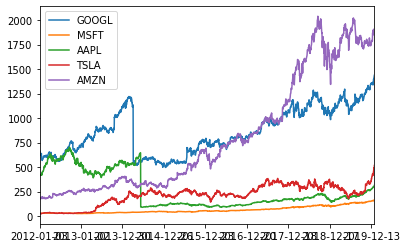

In [183]:
df = df.loc['2012-01-01':'2012-12-31']
df

,GOOGL,MSFT,AAPL,TSLA,AMZN
2012-01-03,665.4100,26.7650,411.2300,28.0800,179.0300
2012-01-04,668.2800,27.4000,413.4400,27.7100,177.5100
2012-01-05,659.0100,27.6800,418.0300,27.1200,177.6100
2012-01-06,650.0200,28.1050,422.4000,26.9100,182.6100
2012-01-09,622.4600,27.7400,421.7300,27.2500,178.5600
...,...,...,...,...,...
2012-12-24,709.5000,27.0600,520.1680,34.2800,258.6200
2012-12-26,708.8700,26.8600,512.9995,33.5900,248.6314
2012-12-27,706.2900,26.9600,515.0600,33.6900,248.3100
2012-12-28,700.0100,26.5500,509.5892,33.2200,245.1800


**Para los siguientes ejercicios utiliza información del 2018 a la fecha**

4. Calcula el rendimiento esperado diario de cada emisora

5. Calcula el rendimiento esperado anual de cada emisora

6. Dado los siguientes ponderadores, calcula el rendimiento esperado diario del portafolio

In [ ]:
# Generación de ponderadores aleatorios
seed(314)
w = np.random.random(size=5)
w = w / w.sum()

7. Dado ponderadores $w$, calcula el rendimiento esperado anual del portafolio

8. Calcula la matriz de variaza/covarianza

9. Calcula la varianza anual del portafolio

10. Calcula la desviación estándar anual del portafolio

11. Para cada ticker, calcula la distribución a posteriori de su rendimiento $\mu_r$ asumiendo una distribución a priori normal y $\sigma_r$ conocida (asume que $\sigma_r$ es la desviación estándard muestral)

    * Para cada ticker, ¿cuál es la probabilida de que $\mu_r$ se positivo? ($\forall r. p(\mu_r) > 0$)
    * Cómo elegiste los hyperparámetros de la distribución a priori?